# Simple regression with TensorFlow

Progressive example working through various network set ups

https://towardsdatascience.com/training-neural-networks-for-price-prediction-with-tensorflow-8aafe0c55198

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [54]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.1


In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [56]:
dat = pd.read_csv("./rbfs/phi_reduce.csv")
dat.head()
#X = np.load("./rbfs/phi_reduce.npy")
#y = np.load("./rbfs/y.npy")

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,854,855,856,857,858,859,860,y,site,date
0,0,1.000000,0.997378,0.989553,0.976648,0.958862,0.936470,0.909811,0.879282,0.845327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014,2005,2023-01-01
1,1,1.000000,0.997433,0.989662,0.976809,0.959074,0.936729,0.910113,0.879622,0.845701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007,2005,2023-01-01
2,2,0.999999,0.997487,0.989771,0.976971,0.959285,0.936987,0.910414,0.879962,0.846074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,2005,2023-01-01
3,3,0.999997,0.997541,0.989879,0.977131,0.959496,0.937245,0.910715,0.880302,0.846447,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009,2005,2023-01-01
4,4,0.999995,0.997594,0.989986,0.977291,0.959707,0.937502,0.911016,0.880641,0.846820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,2005,2023-01-01


In [57]:
dat2 = dat[dat['date'] == "2023-01-01"]
dat2.shape

(191, 865)

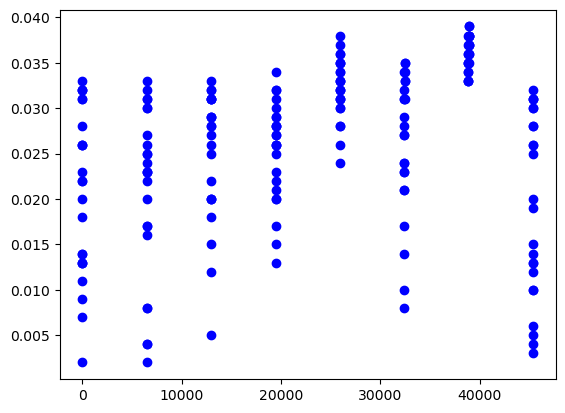

In [58]:
plt.plot(dat2['y'], 'bo')

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8, random_state=42)

In [60]:
## Alternate for site samples
train = dat[dat.site != 2005]
print(train.shape)
X_train = train.iloc[:, 1:862]
y_train = train['y']

(45330, 865)


In [61]:
train.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,854,855,856,857,858,859,860,y,site,date
6491,6491,1.000000,0.997378,0.989553,0.976648,0.958862,0.936470,0.909811,0.879282,0.845327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017,3006,2023-01-01
6492,6492,1.000000,0.997433,0.989662,0.976809,0.959074,0.936729,0.910113,0.879622,0.845701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008,3006,2023-01-01
6493,6493,0.999999,0.997487,0.989771,0.976971,0.959285,0.936987,0.910414,0.879962,0.846074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,3006,2023-01-01
6494,6494,0.999997,0.997541,0.989879,0.977131,0.959496,0.937245,0.910715,0.880302,0.846447,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,3006,2023-01-01
6495,6495,0.999995,0.997594,0.989986,0.977291,0.959707,0.937502,0.911016,0.880641,0.846820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017,3006,2023-01-01


In [62]:
## Alternate for site samples
test = dat[dat.site == 2005]
print(test.shape)
X_test = test.iloc[:, 1:862]
y_test = test['y']

(6491, 865)


In [63]:
print(y_train[0:100])
print(y_test[0:100])

6491    0.017
6492    0.008
6493    0.004
6494    0.002
6495    0.017
        ...  
6586    0.018
6587    0.008
6588    0.008
6589    0.010
6590    0.016
Name: y, Length: 100, dtype: float64
0     0.014
1     0.007
2     0.002
3     0.009
4     0.011
      ...  
95    0.024
96    0.024
97    0.031
98    0.034
99    0.031
Name: y, Length: 100, dtype: float64


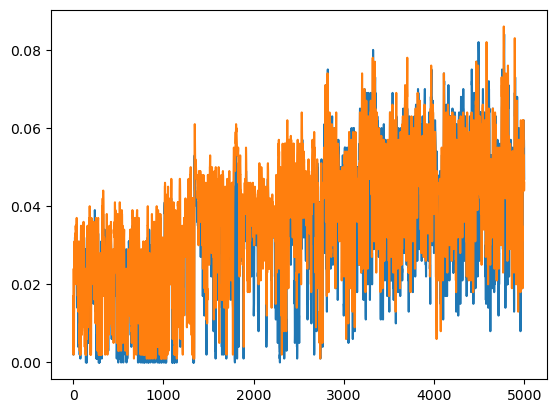

In [64]:
plt.plot(np.arange(0,5000), y_test[0:5000])
plt.plot(np.arange(0,5000), y_train[0:5000])
plt.show()


(array([2.3480e+03, 3.3990e+03, 7.9100e+03, 1.2078e+04, 1.1162e+04,
        6.4450e+03, 1.6590e+03, 2.8200e+02, 4.0000e+01, 7.0000e+00]),
 array([-0.001 ,  0.0094,  0.0198,  0.0302,  0.0406,  0.051 ,  0.0614,
         0.0718,  0.0822,  0.0926,  0.103 ]),
 <BarContainer object of 10 artists>)

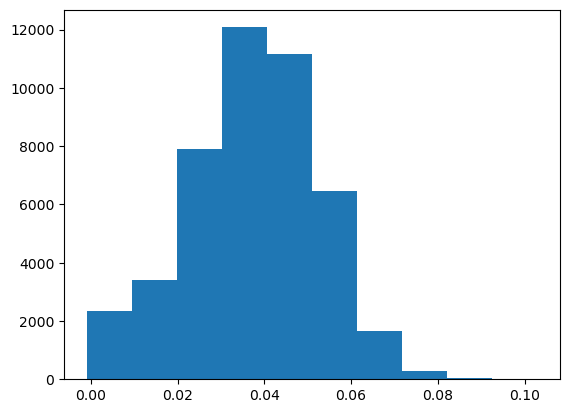

In [65]:
plt.hist(y_train)

## TensorFlow

In [66]:
# Set random seed
tf.random.set_seed(42)
from keras import Sequential
from keras import models
from keras import layers

In [67]:
n_feat = X_train.shape[1]

### Model 1 (Simple TF regression)

In [68]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dense(512, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Initial_model")
model.summary()

Model: "Initial_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               441344    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 934145 (3.56 MB)
Trainable params: 9341

In [69]:
# Compile the model
initial_learning_rate = 0.00001
optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [70]:
history=model.fit(X_train, y_train, epochs=50, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/50
36/36 [==============================] - 1s 27ms/step - loss: 0.0321 - mae: 0.0321 - mse: 0.0035 - val_loss: 0.0144 - val_mae: 0.0144 - val_mse: 3.1438e-04
Epoch 2/50
36/36 [==============================] - 1s 24ms/step - loss: 0.0096 - mae: 0.0096 - mse: 1.5076e-04 - val_loss: 0.0130 - val_mae: 0.0130 - val_mse: 2.6336e-04
Epoch 3/50
36/36 [==============================] - 1s 22ms/step - loss: 0.0093 - mae: 0.0093 - mse: 1.4340e-04 - val_loss: 0.0135 - val_mae: 0.0135 - val_mse: 2.7937e-04
Epoch 4/50
36/36 [==============================] - 1s 22ms/step - loss: 0.0093 - mae: 0.0093 - mse: 1.4353e-04 - val_loss: 0.0131 - val_mae: 0.0131 - val_mse: 2.6021e-04
Epoch 5/50
36/36 [==============================] - 1s 20ms/step - loss: 0.0093 - mae: 0.0093 - mse: 1.4273e-04 - val_loss: 0.0126 - val_mae: 0.0126 - val_mse: 2.4536e-04
Epoch 6/50
36/36 [==============================] - 1s 20ms/step - loss: 0.0092 - mae: 0.0092 - mse: 1.4161e-04 - val_loss: 0.0135 - val_mae: 0.0135 

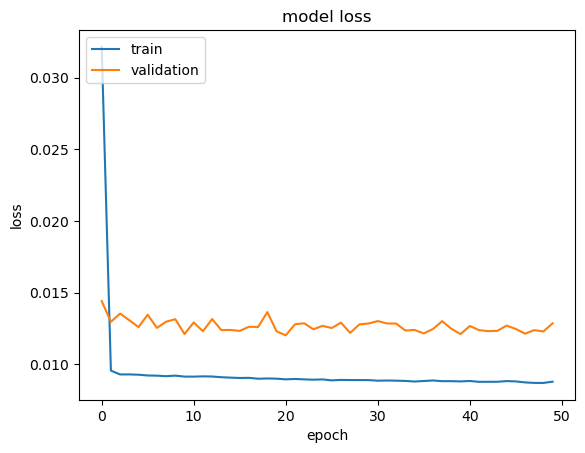

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [72]:
y_test_pred = model.predict(X_test)
mean_absolute_error(y_test, y_test_pred)

203/203 [==============================] - 0s 2ms/step


0.011832249052650413

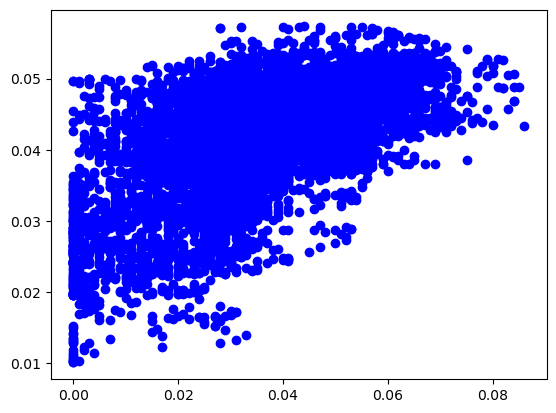

In [73]:
plt.plot(y_test, y_test_pred, 'bo')

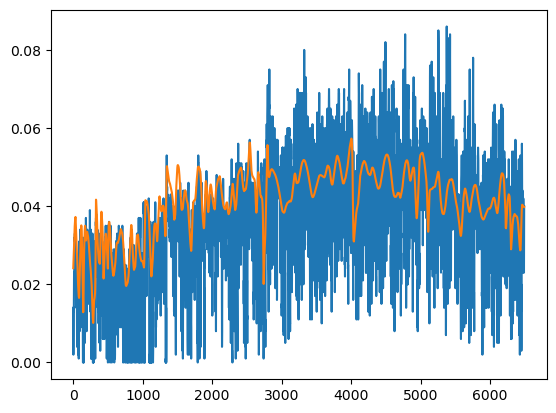

In [74]:
plt.plot(y_test)
plt.plot(y_test_pred)
plt.show()

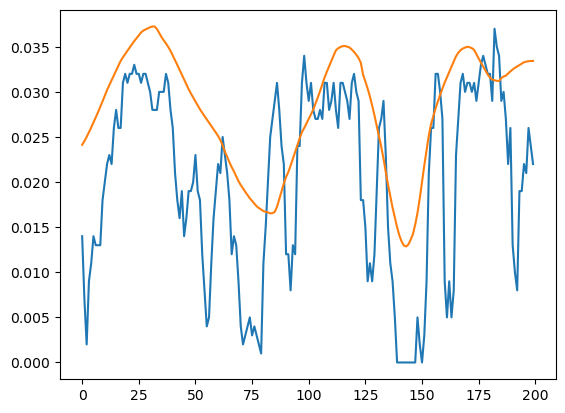

In [75]:
plt.plot(y_test[0:200])
plt.plot(y_test_pred[0:200])
plt.show()

### Regularization with drop-outs

In [76]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dropout(0.2),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Dropout")
model.summary()

Model: "Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               441344    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               6579

In [77]:
# Compile the model
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [78]:
history=model.fit(X_train, y_train, epochs=50, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/50
36/36 [==============================] - 1s 27ms/step - loss: 0.0421 - mae: 0.0421 - mse: 0.0086 - val_loss: 0.0160 - val_mae: 0.0160 - val_mse: 3.9336e-04
Epoch 2/50
36/36 [==============================] - 1s 24ms/step - loss: 0.0108 - mae: 0.0108 - mse: 1.8770e-04 - val_loss: 0.0135 - val_mae: 0.0135 - val_mse: 2.8661e-04
Epoch 3/50
36/36 [==============================] - 1s 24ms/step - loss: 0.0102 - mae: 0.0102 - mse: 1.6835e-04 - val_loss: 0.0125 - val_mae: 0.0125 - val_mse: 2.4852e-04
Epoch 4/50
36/36 [==============================] - 1s 28ms/step - loss: 0.0099 - mae: 0.0099 - mse: 1.6094e-04 - val_loss: 0.0126 - val_mae: 0.0126 - val_mse: 2.5198e-04
Epoch 5/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0098 - mae: 0.0098 - mse: 1.5767e-04 - val_loss: 0.0123 - val_mae: 0.0123 - val_mse: 2.3855e-04
Epoch 6/50
36/36 [==============================] - 1s 25ms/step - loss: 0.0097 - mae: 0.0097 - mse: 1.5426e-04 - val_loss: 0.0122 - val_mae: 0.0122 

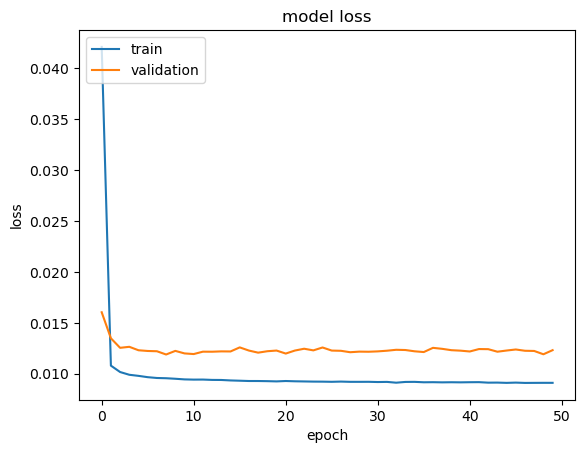

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [80]:
y_test_pred = model.predict(X_test)
mean_absolute_error(y_test, y_test_pred)

203/203 [==============================] - 0s 1ms/step


0.011506111436224629

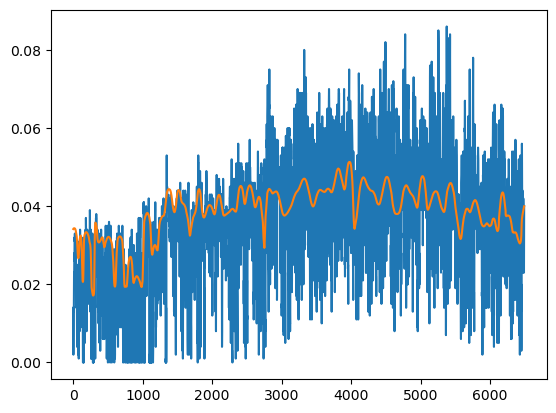

In [81]:
plt.plot(y_test)
plt.plot(y_test_pred)
plt.show()

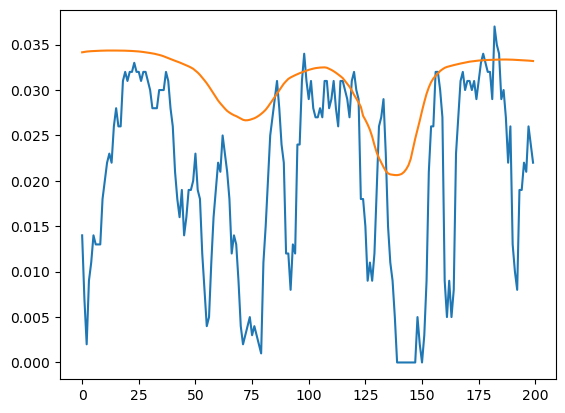

In [82]:
plt.plot(y_test[0:200])
plt.plot(y_test_pred[0:200])
plt.show()